In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler           #import the necessary modules 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.preprocessing import image    

In [2]:
data = pd.read_csv('C:/Users/vasil/Desktop/tensorflow/FER/data/icml_face_data.csv')
pixel_data = data[' pixels']
label_data = data['emotion']            #open the csv file and categorize the data to pictures and emotions

In [3]:
def preprocess_pixels(pixel_data):
    images=[]
    for i in range(len(pixel_data)):
        img = np.fromstring(pixel_data[i], dtype='int', sep=' ')    #define the function to iterate and reshape the images to a 48x48x1 format
        img = img.reshape(48,48,1)
        images.append(img)
    X = np.array(images)
    return X

In [4]:
oversampler = RandomOverSampler(sampling_strategy='auto')
X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)  #oversampling magic to equalize the dataset
X_over_series = pd.Series(X_over.flatten()) #flatten the dataframe of the images

In [5]:
X = preprocess_pixels(X_over_series)
Y = Y_over                                              #use the fuction from earlier to the oversampled images
Y = Y_over.values.reshape(Y.shape[0],1)                 #reshape the values of the emotions                                 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45) #split the dataset to training and testing batches 

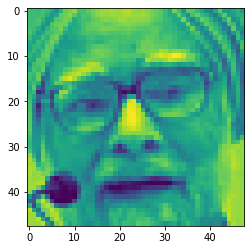

In [6]:
plt.imshow(X[1,:,:,0])              #plot the first picture of the dataset

In [7]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', strides=(1,1), input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', strides=(1,1), padding='same'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', strides=(1,1), padding ='valid' ),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(7, activation='softmax')





    
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 256)       295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 21, 256)       1

In [9]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [10]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
y_train=tf.keras.utils.to_categorical(Y_train, num_classes = 7)
y_test=tf.keras.utils.to_categorical(Y_test, num_classes = 7)


In [11]:
model.fit(X_train, y_train, epochs=35, validation_data=(X_test, y_test))

Epoch 1/35
1770/1770 [==============================] - 164s 86ms/step - loss: 1.6735 - accuracy: 0.3798 - val_loss: 1.2928 - val_accuracy: 0.5017
Epoch 2/35
1770/1770 [==============================] - 148s 83ms/step - loss: 1.2427 - accuracy: 0.5301 - val_loss: 1.0476 - val_accuracy: 0.6031
Epoch 3/35
1770/1770 [==============================] - 148s 84ms/step - loss: 1.0514 - accuracy: 0.6009 - val_loss: 0.9351 - val_accuracy: 0.6483
Epoch 4/35
1770/1770 [==============================] - 149s 84ms/step - loss: 0.9170 - accuracy: 0.6595 - val_loss: 0.8589 - val_accuracy: 0.6876
Epoch 5/35
1770/1770 [==============================] - 150s 85ms/step - loss: 0.8008 - accuracy: 0.6990 - val_loss: 0.7715 - val_accuracy: 0.7210
Epoch 6/35
1770/1770 [==============================] - 153s 86ms/step - loss: 0.6845 - accuracy: 0.7462 - val_loss: 0.7103 - val_accuracy: 0.7521
Epoch 7/35
1770/1770 [==============================] - 154s 87ms/step - loss: 0.5741 - accuracy: 0.7903 - val_loss: 0

KeyboardInterrupt: 

In [12]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [5]:
model=tf.keras.models.load_model('model')
#preds=model.predict(X_train)
#def get_class(preds):
#    pred_class=np.zeros((preds.shape[0],1))
    
#    for i in range(len(preds)):
 #       pred_class[i] = np.argmax(preds[i])

 #   return pred_class
#pred_class_train=get_class(preds)




In [22]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
img_path = 'alibaba.jpg'
img= image.load_img(img_path, color_mode='grayscale', target_size=(48,48))
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model.predict(x))
print('The predicted result is: ' + label_dict[prediction])
print(model.predict(x))

The predicted result is: Happiness
[[1.4758285e-08 2.6344340e-19 1.7603906e-10 9.9994707e-01 8.5003053e-09
  2.2061487e-12 5.2941123e-05]]
